In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
print(digits.images[0]) # 해당 인덱스의 이미지를 행렬로서 출력가능

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [3]:
print(digits.target[0])

0


In [4]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))

전체 샘플의 수 : 1797


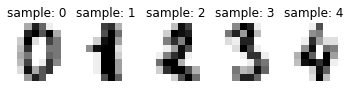

In [6]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in  enumerate(images_and_labels[:5]):
    plt.subplot(2,5, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i ' % label)

In [34]:
X = digits.data
Y = digits.target

In [8]:
import torch
import torch.nn as nn
from torch import optim

In [22]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(1)
if device == 'cuda':
    torch.cuda.manual_seed_all(1)

In [23]:
model = nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10),
    nn.ReLU()
).to(device)

In [42]:
X = torch.tensor(X, dtype=torch.float32).to(device)
Y = torch.tensor(Y, dtype=torch.int64).to(device)

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [43]:
loss_fn = nn.CrossEntropyLoss().to(device)

In [44]:
optimizer = optim.Adam(model.parameters())

In [45]:
losses = []

In [46]:
for epoch in range(2001):
    y_pred = model(X)
    loss = loss_fn(y_pred, Y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch %100 ==0:
        print('epoch {:4d}/{} loss {:4f}'.format(epoch, range(2001), loss.item()))
    
    losses.append(loss.item())
        

epoch    0/range(0, 2001) loss 0.000001
epoch  100/range(0, 2001) loss 0.000000
epoch  200/range(0, 2001) loss 0.000000
epoch  300/range(0, 2001) loss 0.000000
epoch  400/range(0, 2001) loss 0.000000
epoch  500/range(0, 2001) loss 0.000000
epoch  600/range(0, 2001) loss 0.000000
epoch  700/range(0, 2001) loss 0.000000
epoch  800/range(0, 2001) loss 0.000000
epoch  900/range(0, 2001) loss 0.000000
epoch 1000/range(0, 2001) loss 0.000000
epoch 1100/range(0, 2001) loss 0.000000
epoch 1200/range(0, 2001) loss 0.000000
epoch 1300/range(0, 2001) loss 0.000000
epoch 1400/range(0, 2001) loss 0.000000
epoch 1500/range(0, 2001) loss 0.000000
epoch 1600/range(0, 2001) loss 0.000000
epoch 1700/range(0, 2001) loss 0.000000
epoch 1800/range(0, 2001) loss 0.000000
epoch 1900/range(0, 2001) loss 0.000000
epoch 2000/range(0, 2001) loss 0.000000


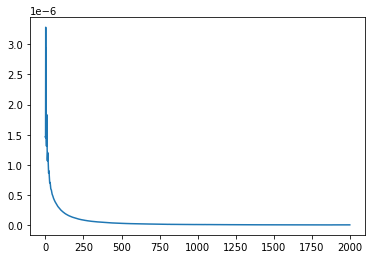

In [47]:
plt.plot(losses)

In [39]:
x= torch.FloatTensor(X)
y= torch.IntTensor(Y)
print(x.type())
print(y.type())

TypeError: expected Int (got Long)

In [40]:
X = torch.tensor(X)
Y = torch.tensor(Y)
print(X.type())
print(Y.type())

torch.FloatTensor
torch.LongTensor


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
